In [1]:
from IPython.display import display, Image
from prov.model import ProvDocument
from prov.dot import prov_to_dot
from shortid import ShortId

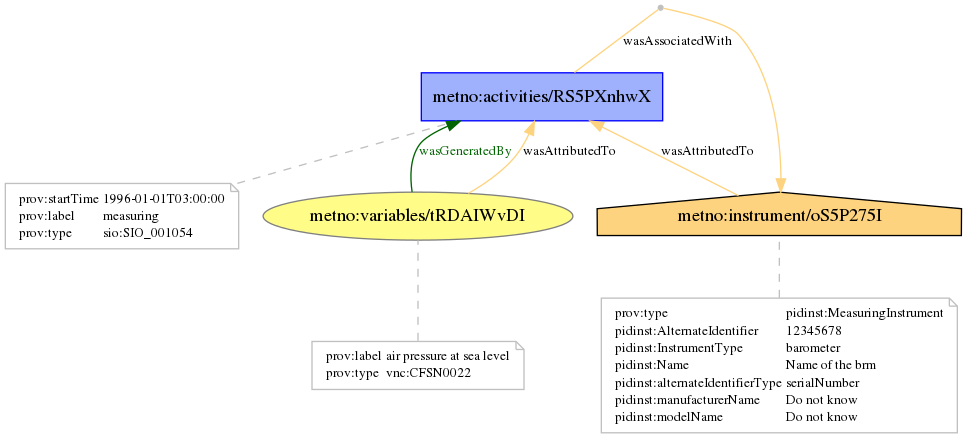

In [2]:
#Specific Weather station steps 
#instrument/measures/parameter
#logger/records/observation
#Iridium/sends/data
#Obsinn/converts to kvalobsformat/data
#Kvalobs/controls/data
#kdvh/stores/data


#look up in 
vocab = {
    #http://semanticscience.org/resource/SIO_001054
    'sio:SIO_001054': 'measuring',
    'sio:SIO_000396': 'file',
    #'obo:NCIT_C15311': 'Quality Control',
    #'obo:NCIT_C48177': 'Processing',
    #'obo:OBI_0200170': 'averaging data transformation',
    #add air pressure at sea level 
    #'sopropp:SeaLevelPressure': 'air pressure at sea level', 
    'vnc:CFSN0022' : 'air pressure at sea level'
    #what is identifier SDN:P07::CFSN0022?
}

sid = ShortId()
prov = ProvDocument()

#ontology namespace 
prov.add_namespace('sio', 'http://semanticscience.org/resource/')
prov.add_namespace('metno', 'http://metno.no/')
prov.add_namespace('pidinst', 'http://pidinst.org/')
#sweet ontology prop pressure
#prov.add_namespace('sopropp','http://sweetontology.net/propPressure/')
#nerc ontology
prov.add_namespace('vcn', 'http://vocab.nerc.ac.uk/collection/P07/current/')
prov.add_namespace('rdfs', 'http://www.w3.org/2000/01/rdf-schema#')

#first set of triples: instruments measures parameter
#baromenter/measures/air_pressure_at_sea_level

#the barometer
#agent(identifier, other_attributes=None)
barometer = prov.agent('metno:instrument/{}'.format(sid.generate()), 
                 other_attributes={'prov:type': 'pidinst:MeasuringInstrument',
                                   'pidinst:InstrumentType': 'barometer',
                                   'pidinst:manufacturerName': 'Do not know',
                                   'pidinst:modelName': 'Do not know',
                                   'pidinst:Name': 'Name of the brm',
                                   'pidinst:AlternateIdentifier': '12345678',
                                   'pidinst:alternateIdentifierType': 'serialNumber'})

#measures
#activity(identifier, startTime=None, endTime=None, other_attributes=None)
measure = prov.activity('metno:activities/{}'.format(sid.generate()), '1996-01-01T03:00:00', 
                    other_attributes={'prov:label': vocab['sio:SIO_001054'], 
                                      'prov:type': 'sio:SIO_001054'})

#sea level pressure 
#entity(identifier, other_attributes=None)[source]                                                                                                          
air_pres_sl = prov.entity('metno:variables/{}'.format(sid.generate()), 
                  other_attributes={'prov:type': 'vnc:CFSN0022',
                                    'prov:label': vocab['vnc:CFSN0022']})

#Generation is the completion of production of a new entity by an activity. 
#This entity did not exist before generation and becomes available for usage after this generation.
#entity variable was generated by the measure  
prov.wasGeneratedBy(air_pres_sl, measure)

#An activity association is an assignment of responsibility to an agent for an activity, 
#indicating that the agent had a role in the activity.
#the activity of measuring is due to the agent barometer
prov.wasAssociatedWith(measure, barometer)


#Creates a new attribution record between this entity and an agent.
#wasAttributedTo(agent, attributes=None)
prov.wasAttributedTo(barometer, measure)

#Creates a new attribution record between an entity and an agent.
#wasAttributedTo(entity, agent, identifier=None, other_attributes=None)
prov.wasAttributedTo(air_pres_sl, measure)


#add Location of the weather station
#prov.atLocation()

prov.serialize('data-provenance-sios.ttl', format='rdf', rdf_format='ttl')

dot = prov_to_dot(prov)
display(Image(dot.create_png()))